##**Assignment 3 : Classification Analysis<br>**
Implementation of Support Vector Machines (SVM) for classifying images of handwritten digits into their respective numerical classes (0 to 9).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)

In [3]:
# The data is stored in the 'data' attribute and labels in the 'target' attribute
X = mnist.data
y = mnist.target.astype(np.int64)  # Convert target to integer type

In [4]:
# Display the shape of the dataset
print(f"Data shape: {X.shape}, Labels shape: {y.shape}")

Data shape: (70000, 784), Labels shape: (70000,)


In [5]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale')  # Radial Basis Function kernel

In [8]:
# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

SVC(C=1)

In [9]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [10]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1310    1    5    1    0    5   11    5    5    0]
 [   0 1580    8    2    1    0    0    5    3    1]
 [   3    8 1323    8    8    3    5   11    9    2]
 [   1    3   15 1362    3   13    1   24    8    3]
 [   1    1    9    0 1247    2    5    6    3   21]
 [   2    3    3   18    2 1219   13    8    5    0]
 [   3    0    3    0    7    5 1365   10    3    0]
 [   2    4   10    1    6    1    0 1459    1   19]
 [   2    7   11   11    6   10    4   12 1290    4]
 [   5    6    6   12   20    0    0   38    6 1327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97     

In [14]:
# Function to plot images with predicted labels
def plot_images(images, labels, predictions, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        # Access labels and predictions using .iloc to ensure positional indexing
        plt.title(f"True: {labels.iloc[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

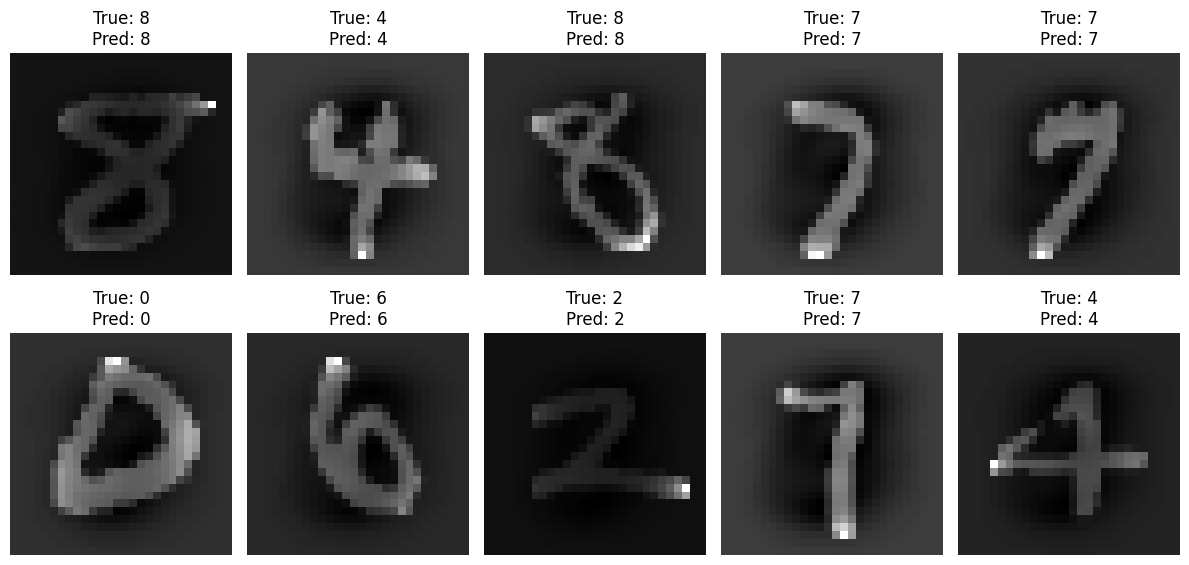

In [15]:
# Visualizing the first 10 images from the test set with their predictions
plot_images(X_test, y_test, y_pred)